In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [9]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# Створення архітектури моделі
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 110s 289ms/step - loss: 0.6146 - accuracy: 0.7751 - val_loss: 0.3878 - val_accuracy: 0.8576
Epoch 2/20
375/375 [==============================] - 105s 279ms/step - loss: 0.3810 - accuracy: 0.8622 - val_loss: 0.3113 - val_accuracy: 0.8830
Epoch 3/20
375/375 [==============================] - 102s 271ms/step - loss: 0.3220 - accuracy: 0.8825 - val_loss: 0.2740 - val_accuracy: 0.8992
Epoch 4/20
375/375 [==============================] - 100s 267ms/step - loss: 0.2906 - accuracy: 0.8935 - val_loss: 0.2646 - val_accuracy: 0.9036
Epoch 5/20
375/375 [==============================] - 106s 282ms/step - loss: 0.2647 - accuracy: 0.9026 - val_loss: 0.2526 - val_accuracy: 0.9064
Epoch 6/20
375/375 [==============================] - 106s 282ms/step - loss: 0.2413 - accuracy: 0.9107 - val_loss: 0.2522 - val_accuracy: 0.9072
Epoch 7/20
375/375 [==============================] - 100s 267ms/step - loss: 0.2231 - accuracy: 0.9169 - val_loss: 0.2347 -

In [14]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 6s 19ms/step - loss: 0.3160 - accuracy: 0.9123
Test accuracy: 0.9122999906539917


In [16]:
# Виведення графіків навчання
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

<Figure size 640x480 with 0 Axes>

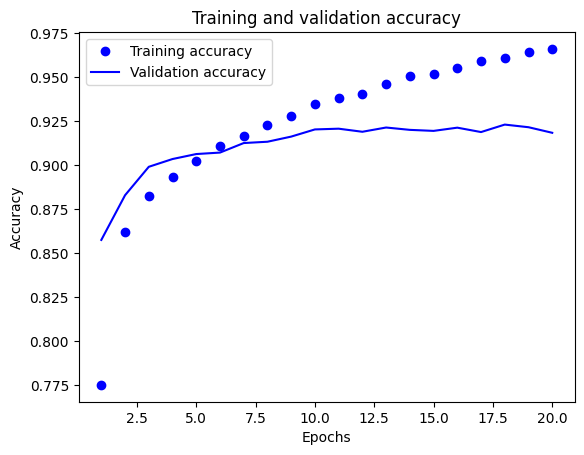

<Figure size 640x480 with 0 Axes>

In [17]:
# Графік точності
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

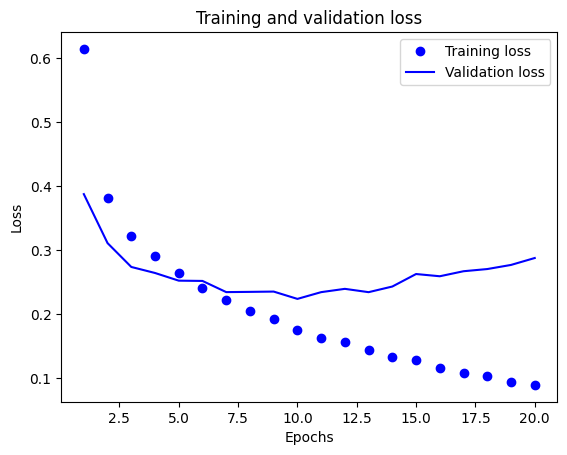

In [18]:
# Графік втрат
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# Отримання прогнозів для тестових даних
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1).numpy()

313/313 [==============================] - 8s 24ms/step


In [20]:
# Виведення метрик якості для кожного класу
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.91      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.89      0.85      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.79      0.71      0.74      1000
           7       0.92      0.99      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

